In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import matplotlib.ticker as ticker

### **Loading all the dataset**

In [35]:
#Loading all the dataset
hist_data = pd.read_csv("historical_energy_data.csv")
inf_data = pd.read_csv("infrastructure_data.csv")
mark_data = pd.read_csv("market_data.csv")
reg_data = pd.read_csv("regulatory_data.csv")
hist_data.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,03/01/2012,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,04/01/2012,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,05/01/2012,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [72]:
inf_data.head()

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High
2,03/01/2012,Fair,Upgrades,High
3,04/01/2012,Poor,Repairs,High
4,05/01/2012,Poor,Repairs,High


In [91]:
reg_data.head()

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281
2,2012-01-03,Amendment,Non-compliant,629.891778
3,2012-01-04,New Regulation,Non-compliant,2277.898351
4,2012-01-05,Amendment,Non-compliant,4687.163688


In [50]:
mark_data.head()

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


In [51]:
hist_data.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,03/01/2012,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,04/01/2012,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,05/01/2012,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


### **UNDERSTANDING THE STRUCTURE OF THE DATA**

In [26]:
hist_data.info()

hist_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date/Time                 1000 non-null   object 
 1   Location/Region           1000 non-null   object 
 2   Energy Source             1000 non-null   object 
 3   Energy Demand             1000 non-null   int64  
 4   Energy Consumption (kWh)  1000 non-null   int64  
 5   Energy Price              1000 non-null   float64
 6   Operational Costs         1000 non-null   float64
 7   Energy Production (kWh)   1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49336.335000,24249.533000,0.126752,3002.452425,25502.488000
std,28215.243714,14092.904681,0.042857,1189.898418,14057.976149
min,1015.000000,505.000000,0.050368,1000.630978,850.000000
25%,25812.750000,12017.750000,0.091048,1957.452731,13235.750000
50%,49398.500000,23178.000000,0.126799,2954.748776,24946.000000
75%,73877.500000,36563.000000,0.163701,4095.759662,37653.250000
max,99941.000000,49985.000000,0.199951,4995.000138,49936.000000


In [28]:
inf_data.info()
inf_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date/Time               1000 non-null   object
 1   Infrastructure Status   1000 non-null   object
 2   Maintenance Activities  1000 non-null   object
 3   Technology Limitations  987 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
count,1000,1000,1000,987
unique,1000,3,3,3
top,01/01/2012,Poor,Routine Maintenance,High
freq,1,641,360,776


In [92]:
reg_data.info()
reg_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           1000 non-null   object 
 1   Regulatory Changes  1000 non-null   object 
 2   Compliance Status   1000 non-null   object 
 3   Compliance Costs    1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


,Compliance Costs
count,1000.000000
mean,2841.451262
std,1276.101688
min,503.841638
25%,1778.330823
50%,2906.980088
75%,3892.981360
max,4987.232664


In [30]:
mark_data.info()

mark_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date/Time        1000 non-null   object 
 1   Market Price     1000 non-null   float64
 2   Competitor Data  1000 non-null   object 
 3   Market Trends    1000 non-null   object 
 4   Market Demand    1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


,Market Price,Market Demand
count,1000.000000,1000.000000
mean,0.139154,25392.807000
std,0.063492,13980.103619
min,0.030053,836.000000
25%,0.084488,13515.250000
50%,0.138719,24910.500000
75%,0.192279,37102.750000
max,0.249960,49941.000000


### **DATA CLEANING**

In [38]:
date_format = "%d/%m/%Y"
hist_data['Date/Time'] = pd.to_datetime(hist_data['Date/Time'],format= date_format)

new_date_format = "%d-%m-%Y"
hist_data['Date/Time'] = pd.to_datetime(hist_data['Date/Time'],format= new_date_format)

In [37]:
reg_data['Date/Time'] = pd.to_datetime(reg_data['Date/Time'])

In [36]:
mark_data['Date/Time'] = pd.to_datetime(mark_data['Date/Time'])

In [39]:
date_format = "%d/%m/%Y"
inf_data['Date/Time'] = pd.to_datetime(inf_data['Date/Time'],format= date_format)

new_date_format = "%d-%m-%Y"
inf_data['Date/Time'] = pd.to_datetime(inf_data['Date/Time'],format= new_date_format)

In [40]:
mark_data.head()

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


In [93]:
reg_data.head(1)


,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306


In [42]:
hist_data.value_counts('Location/Region')

Location/Region
Region C    362
Region A    325
Region B    313
Name: count, dtype: int64

In [106]:
datasets = {
    'hist_data': hist_data,
    'inf_data': inf_data,
    'mark_data': mark_data,
    'reg_data': reg_data
}

categorical_columns = {
    'hist_data':['Location/Region','Energy Source'],
    'inf_data': ['Infrastructure Status','Maintenance Activities', 'Technology Limitations'], # Corrected typo in 'Infrastructure Status'
    'mark_data':['Competitor Data','Market Trends'],
    'reg_data': ['Regulatory Changes','Compliance Status']
}

categorical_values_counts = {}

# Iterate through the dictionary of datasets and columns
for dataset, columns in categorical_columns.items():

    for column in columns:
            categorical_values_counts[(dataset, column)] = datasets[dataset][column].value_counts()
        


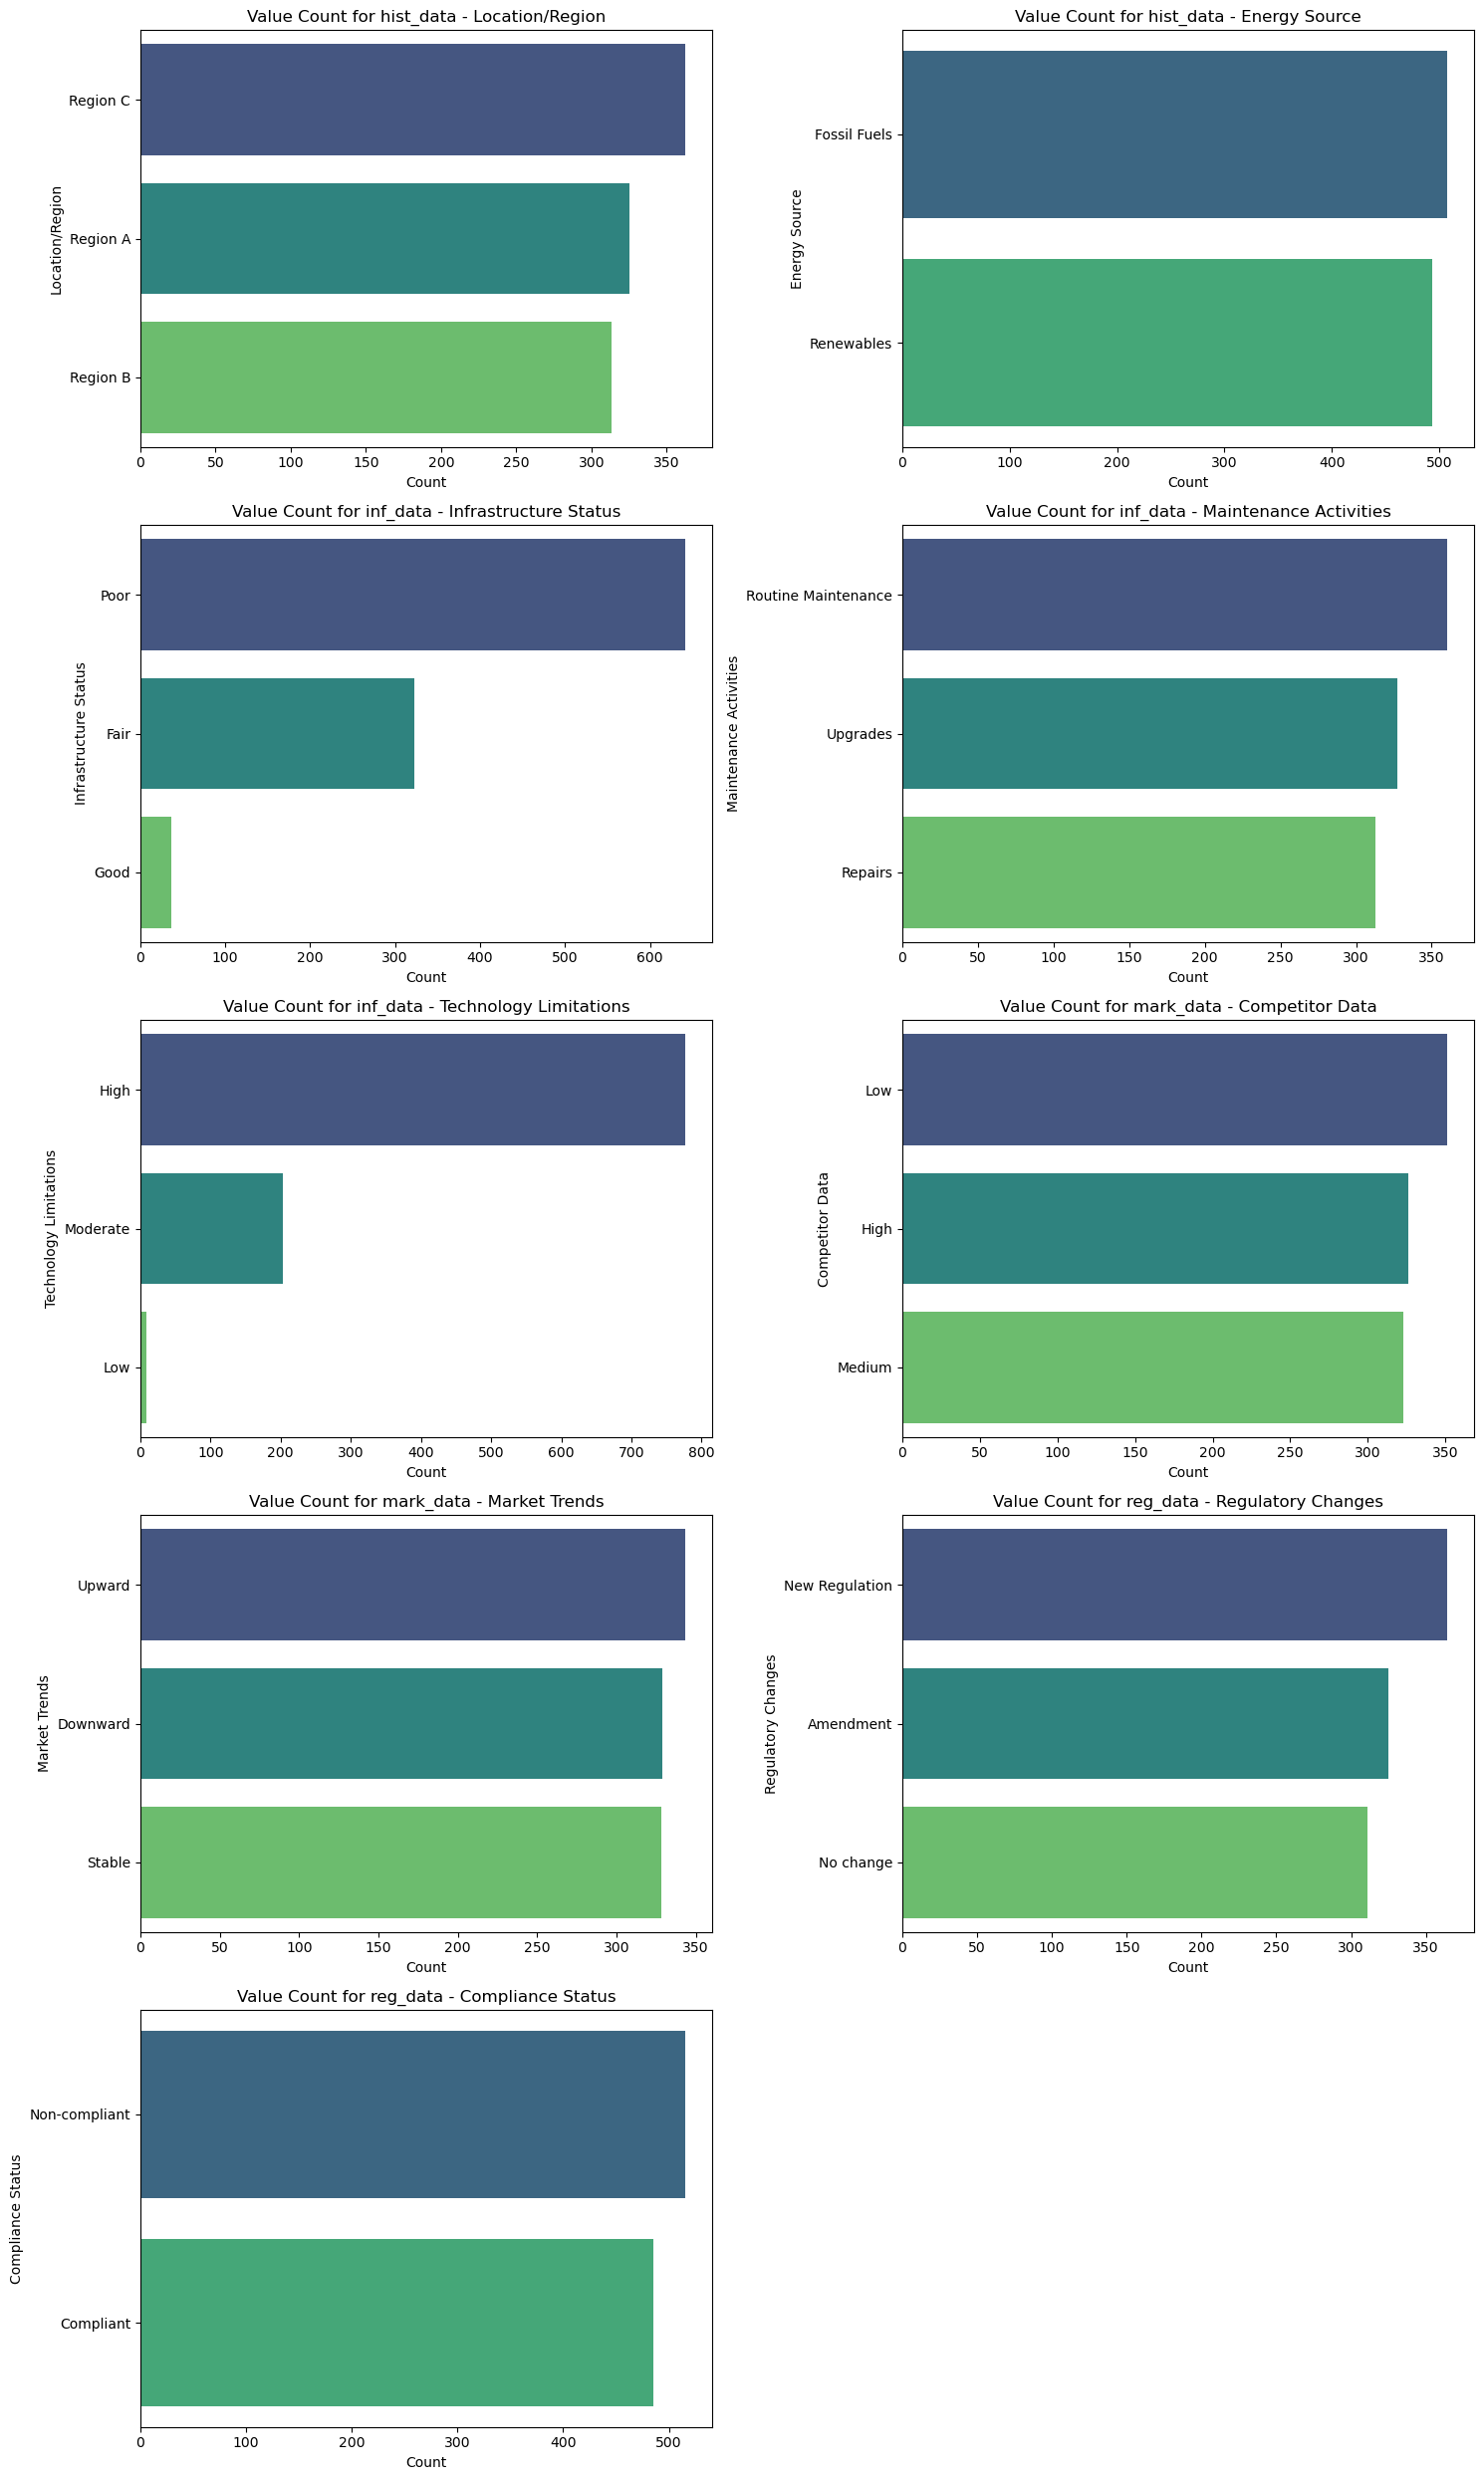

In [111]:
# 1. Calculate the number of subplots needed
num_plots = len(categorical_values_counts)
num_rows = (num_plots + 1) // 2
num_cols = 2

# 2. Correct way to create subplots and set the figure size
# The correct function is plt.subplots (plural) and figsize needs a tuple (width, height)
# A good figure size for a 2-column layout might be (15, 5 * num_rows)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# 3. Flatten the axes array for easy iteration (this part was correct)
axes = axes.flatten()

# 4. Loop through the value counts and create the plots
for i, ((dataset, column), counts) in enumerate(categorical_values_counts.items()):
    # CORRECT: Use the index 'i' to select the current subplot
    ax = axes[i]

    # Use sns.barplot. Since 'counts' is a pandas Series (from .value_counts()):
    # counts.index are the categories (y-axis)
    # counts.values are the counts (x-axis)
    # Ensure the Series index is treated as strings if needed, though seaborn handles it well.
    sns.barplot(x=counts.values, y=counts.index, hue=counts.index, ax=ax, palette="viridis", legend=False) # Added a nice palette

    # Set titles and labels (this logic was mostly correct)
    ax.set_title(f"Value Count for {dataset} - {column}", fontsize=12)
    ax.set_xlabel("Count", fontsize=10)
    ax.set_ylabel(column, fontsize=10)
    
    # Optional: Rotate y-tick labels if they overlap (for long category names)
    # ax.tick_params(axis='y', rotation=0)

# 5. Hide any unused subplots
# This loop was mostly correct, just ensures we start from the number of plots we actually made
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# 6. Adjust layout and show the plot
# CORRECT: The function is plt.tight_layout() (with parentheses)
plt.tight_layout()
plt.show()

## **ENGERGY DEMAND, PRODUCTION AND CONSUMPTION OVER TIME**
### 1. EXAMINNG THE TREND IN ENGERGY DEMAND PRODUCTION AND CONSUMPTION FROM THR historical_energy_data
### 2. iNSIGHT INTO THE FLUCTUATION AND POTENTIAL VULNERABILITIES IN THE ENERGY MARKET


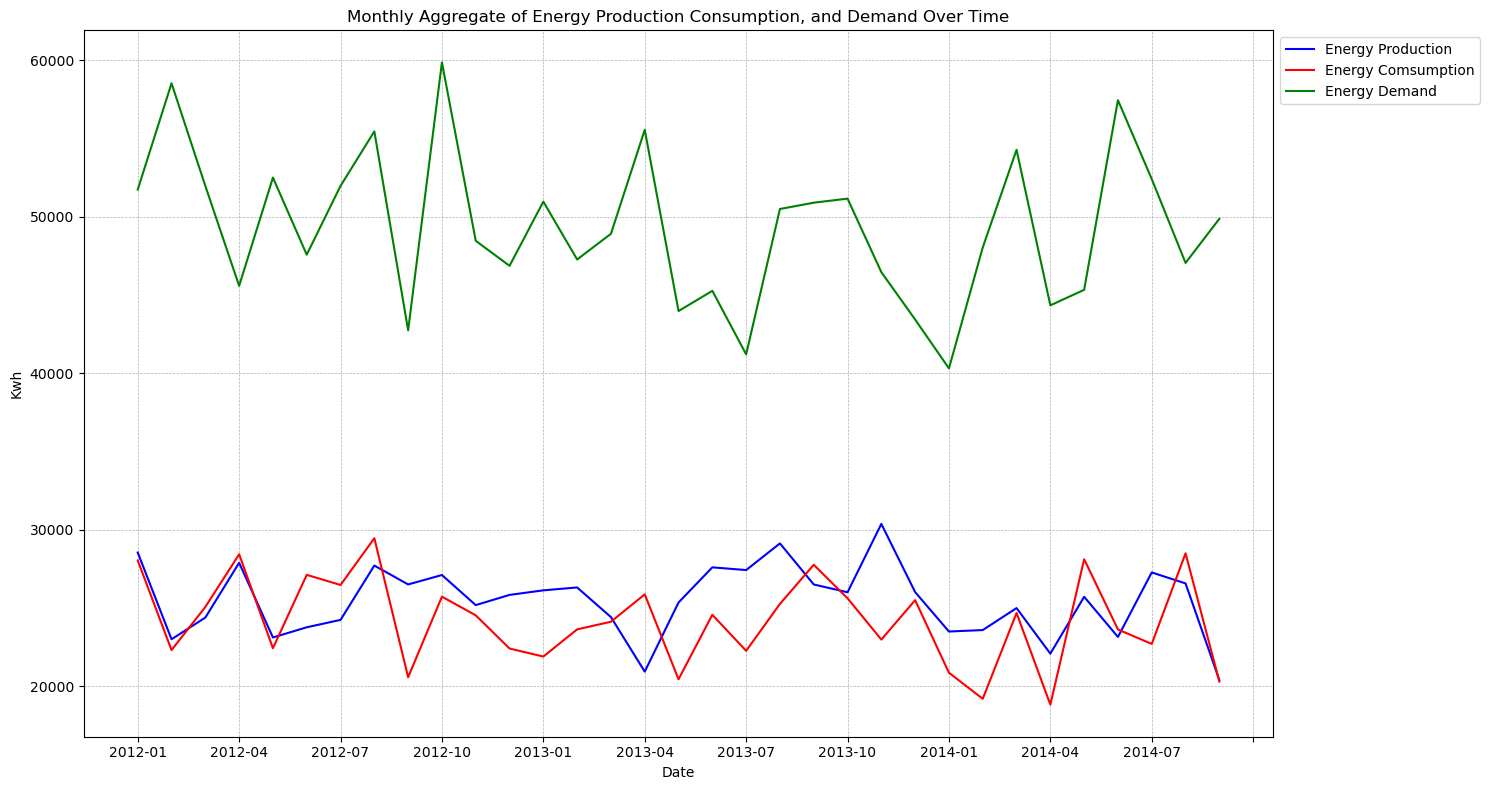

In [31]:
import matplotlib.ticker as ticker
#INSERT THIS LINE TO CONVERT TO DATETIME ---
hist_data['Date/Time'] = pd.to_datetime(hist_data['Date/Time'], dayfirst=True)


# Extract the year and month from the "Date/Time" c=Column 

hist_data["Year"] = hist_data['Date/Time'].dt.year
hist_data["Month"] = hist_data['Date/Time'].dt.month

# Create a new column "Year-month" for easy plotting 
hist_data["Year_month"] = hist_data['Date/Time'].dt.to_period("M")

# Aggregating data on a monthly basics 
month_data = hist_data.groupby("Year_month").mean(numeric_only=True)

#setting figures 
plt.figure(figsize=(15,8))
ax = plt.gca()

#plotting
sns.lineplot(data=month_data, x=month_data.index.astype(str), y='Energy Production (kWh)', label='Energy Production', color='blue', linestyle='-',linewidth=1.5, errorbar=None)
sns.lineplot(data=month_data, x=month_data.index.astype(str), y='Energy Consumption (kWh)', label='Energy Comsumption', color='red', linestyle='-',linewidth=1.5, errorbar=None)
sns.lineplot(data=month_data, x=month_data.index.astype(str), y='Energy Demand', label='Energy Demand', color='green', linestyle='-',linewidth=1.5, errorbar=None)

#Setting the title and labels

ax.xaxis.set_major_locator(ticker.MaxNLocator(12))

plt.title("Monthly Aggregate of Energy Production Consumption, and Demand Over Time")
plt.xlabel("Date")
plt.ylabel('Kwh')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


#Setting our label
labels = month_data.index.astype(str).tolist()
n = 6

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### **Market Price and Energy Price Over Time** 
#### 1. To understand the pricing dynamics and it relation to market trends. 
#### 2. Visualization of the Market data dataset alongside the Energy Price from the historical_energy_data over time

# Aggregating data monthly 
monthly_merged_data = merged_data.groupby(['Year', 'Month']).mean(numeric_only=True)

# Create a new 'Year_Month' column for plotting (FIXED)
monthly_merged_data['Year-Month'] = (
    monthly_merged_data.index.get_level_values(0).astype(str) + 
    '-' + 
    monthly_merged_data.index.get_level_values(1).astype(str).str.zfill(2)
)

#plotting
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Market Price', label='Market Price', color='blue', linestyle='-',linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Energy Price', label='Energy Price', color='red', linestyle='-',linewidth=1.5, errorbar=None)

n = 6
plt.title("Monthly Aggregate of Market Price Over Time")
plt.xlabel("Date")
plt.ylabel('Price($)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Assuming you want to set custom ticks to reduce clutter
# NOTE: You'll need to define 'labels' and 'n' correctly if you use this,
# or better yet, use MaxNLocator as we did before.

# Getting axis object to set MaxNLocator for clean X-axis (Recommended fix for plotting clutter)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(12)) 

plt.xticks(rotation=45, ha='right') # Add rotation for better label fitting
plt.tight_layout()

plt.show()

## **Energy Demand and Energy Price Correlation**
### Let's check if the energy demand is influenced by the current energy price

In [54]:
# merge historical_energy_data and market_data 
merged_data1 = pd.merge(hist_data,mark_data, on='Date/Time', how="inner")

correlation_energy_price = merged_data1["Energy Demand"].corr(merged_data1['Energy Price'])
correlation_merge_price = merged_data1["Market Demand"].corr(merged_data1['Market Price'])


correlation_energy_price 
correlation_merge_price

0.02980230214828854

## **Infrastructure Status and Tech Limitation**
#### 1. To understand the state of infrastructure and technology over time
#### 2. To visualize the frequency of various infrastructure status values and the distribution of technology limitations from the infrastructure_data.csv

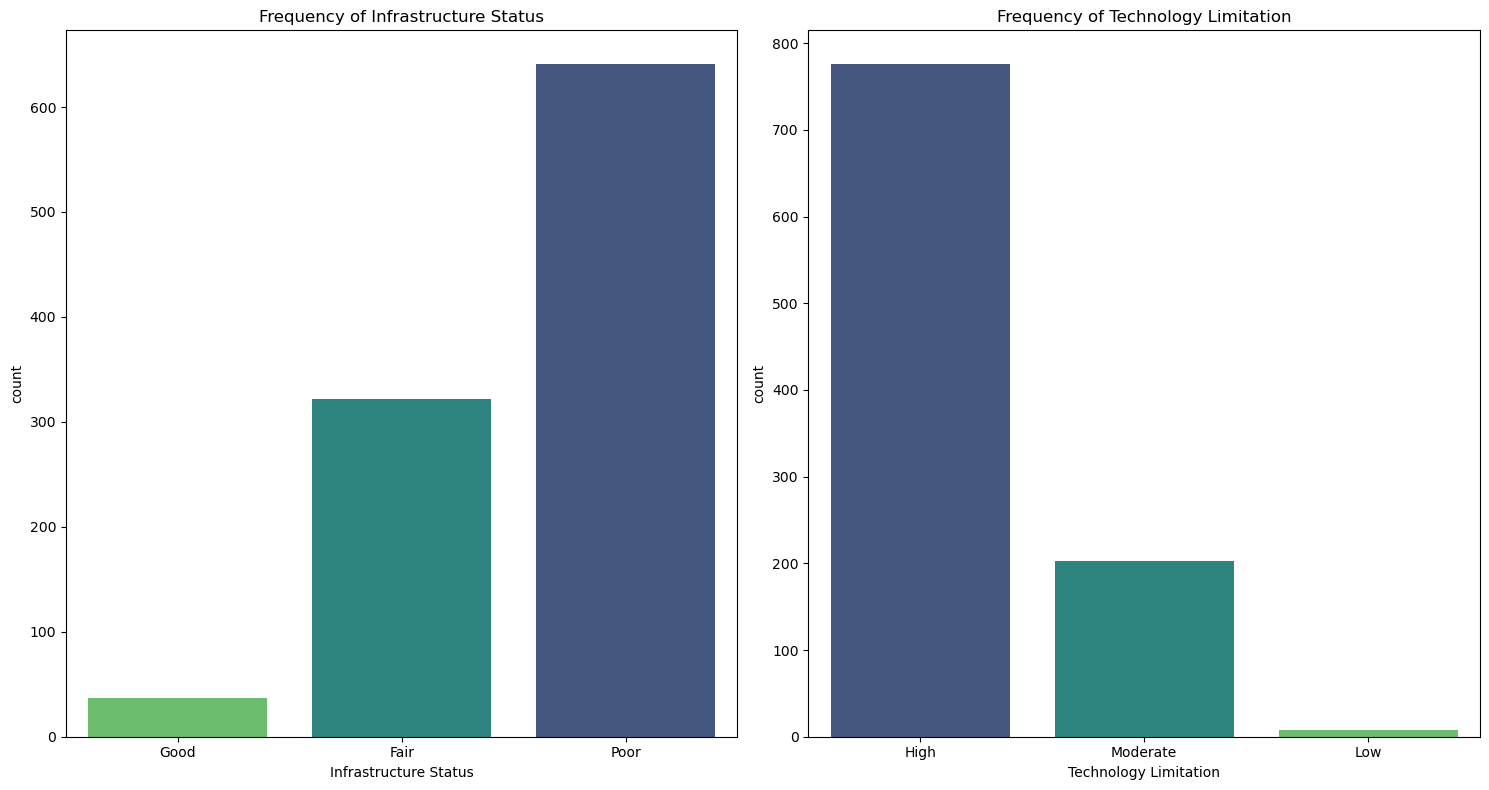

In [66]:
# Setting of figure and axis 
fig, axes = plt.subplots(1,2, figsize=(15, 8))

# Plotting the frequency of Infrastructure status  

sns.countplot(
    data=inf_data, 
    x="Infrastructure Status", 
    ax=axes[0], 
    order=['Good', 'Fair', 'Poor'],
    hue="Infrastructure Status", 
    legend=False, 
    palette='viridis' 
)
axes[0].set_title('Frequency of Infrastructure Status')
axes[0].set_xlabel('Infrastructure Status')
axes[0].set_ylabel('count')

# Plotting the frequency of Technology limitation 

sns.countplot(
    data=inf_data, 
    x="Technology Limitations", 
    ax=axes[1], 
    hue="Technology Limitations", 
    legend=False, 
    palette='viridis'
)
axes[1].set_title('Frequency of Technology Limitation')
axes[1].set_xlabel('Technology Limitation')           
axes[1].set_ylabel('count') 

plt.tight_layout()
plt.show()

### **Let's see the relationship with infrastructure statu and technology limitation 

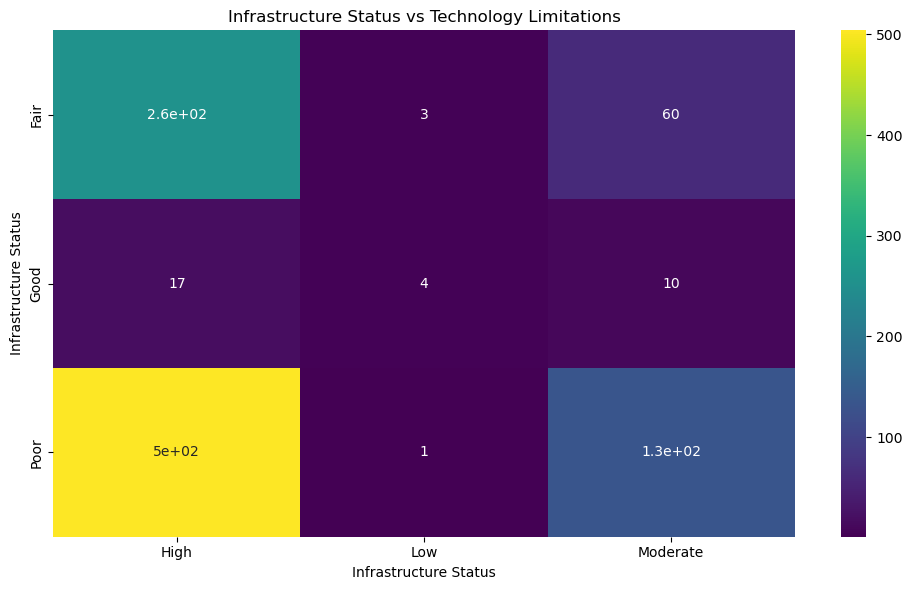

In [69]:
ct = pd.crosstab(inf_data['Infrastructure Status'], inf_data['Technology Limitations'])

plt.figure(figsize=(10, 6))

sns.heatmap(ct, annot=True, cmap='viridis')
plt.title('Infrastructure Status vs Technology Limitations')
plt.xlabel("Technology Limitations")
plt.xlabel("Infrastructure Status")

plt.tight_layout()
plt.show()

### *Correlation between poor infrastructure status, high technology limitation, and the energy Production

In [74]:
inf_data['Poor_infrastructure'] = inf_data['Infrastructure Status'].apply(lambda x: 1 if x == 'Poor' else 0)
inf_data['High_Tech_limitation'] = inf_data['Technology Limitations'].apply(lambda x: 1 if x == 'High' else 0)

inf_data['Combined']= inf_data['Poor_infrastructure']* inf_data['High_Tech_limitation']

merged_data = pd.merge(hist_data, inf_data, on='Date/Time', how='inner')

correlation_coefficient = merged_data['Energy Production (kWh)'].corr(merged_data['Combined'])


In [75]:
correlation_coefficient

-0.015877155348918315

## **Regulatory Changes and Compliance Cost**

#### 1. To understand the impact of regulatory changes 
####    2.  Visualize the frequency of various Regulatory Changes and the distribution of Compliance Costs associated with these changes from the regulatory_data. dataset

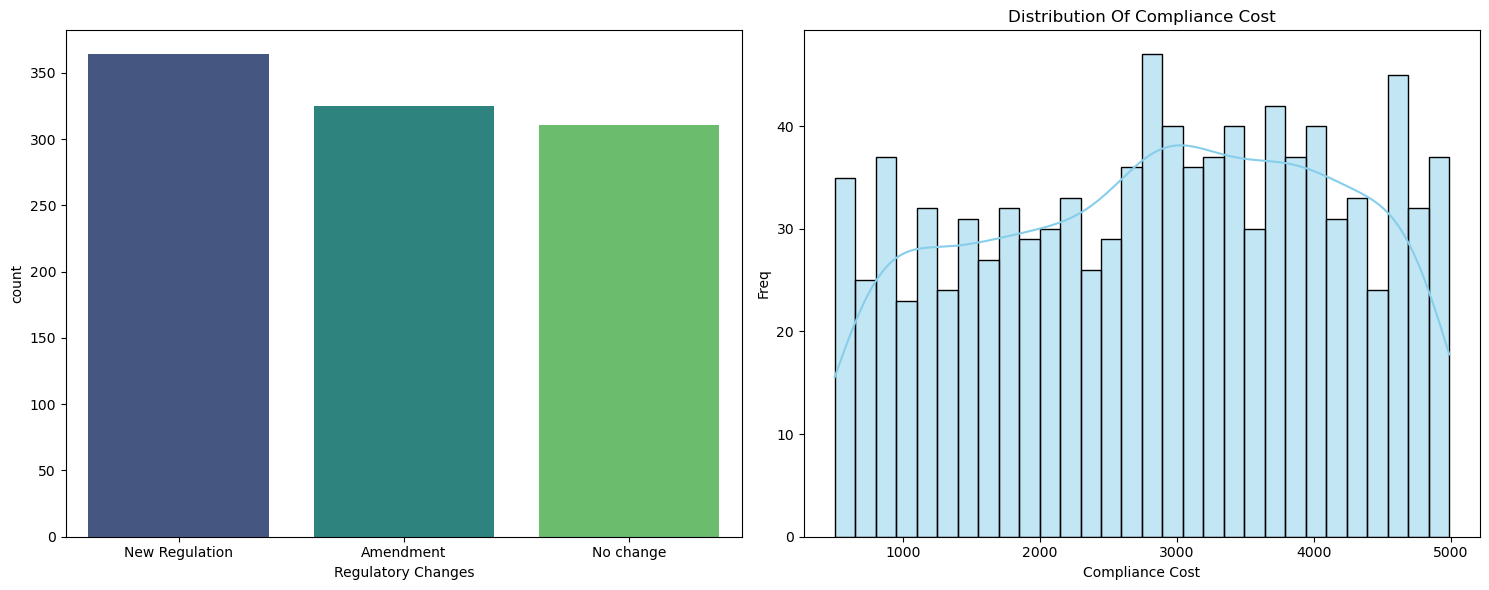

In [78]:
fig,(ax1, ax2)= plt.subplots(1,2, figsize=(15,6))

sns.countplot(
    data=reg_data, 
    x='Regulatory Changes', 
    ax=ax1, 
    hue='Regulatory Changes', 
    legend=False,             
    palette='viridis'
)


sns.histplot(data=reg_data, x="Compliance Costs", ax=ax2, bins= 30,kde=True ,color='skyBlue',)
ax2.set_title('Distribution Of Compliance Cost')
ax2.set_xlabel('Compliance Cost')
ax2.set_ylabel('Freq')

plt.tight_layout()
plt.show()

## **Impact of Regulatory Changes and Operational Costs on Revenue** 

#### 1. Visualise the relations between regulatory changes and the associated compliance costs to the Revenue generated from the company
#### 2. Revenue = Energy Consumption Energy Price 
#### 3. This will provide insight into the financial implications of regulatory changes cost fr Energix Enterprise



In [85]:
print(merged_regulatory_data.dtypes)

Date/Time                   datetime64[ns]
Location/Region                     object
Energy Source                       object
Energy Demand                        int64
Energy Consumption (kWh)             int64
Energy Price                       float64
Operational Costs                  float64
Energy Production (kWh)              int64
Revenue                            float64
Regulatory Changes                  object
Compliance Status                   object
Compliance Costs                   float64
Year                                 int32
Month                                int32
dtype: object


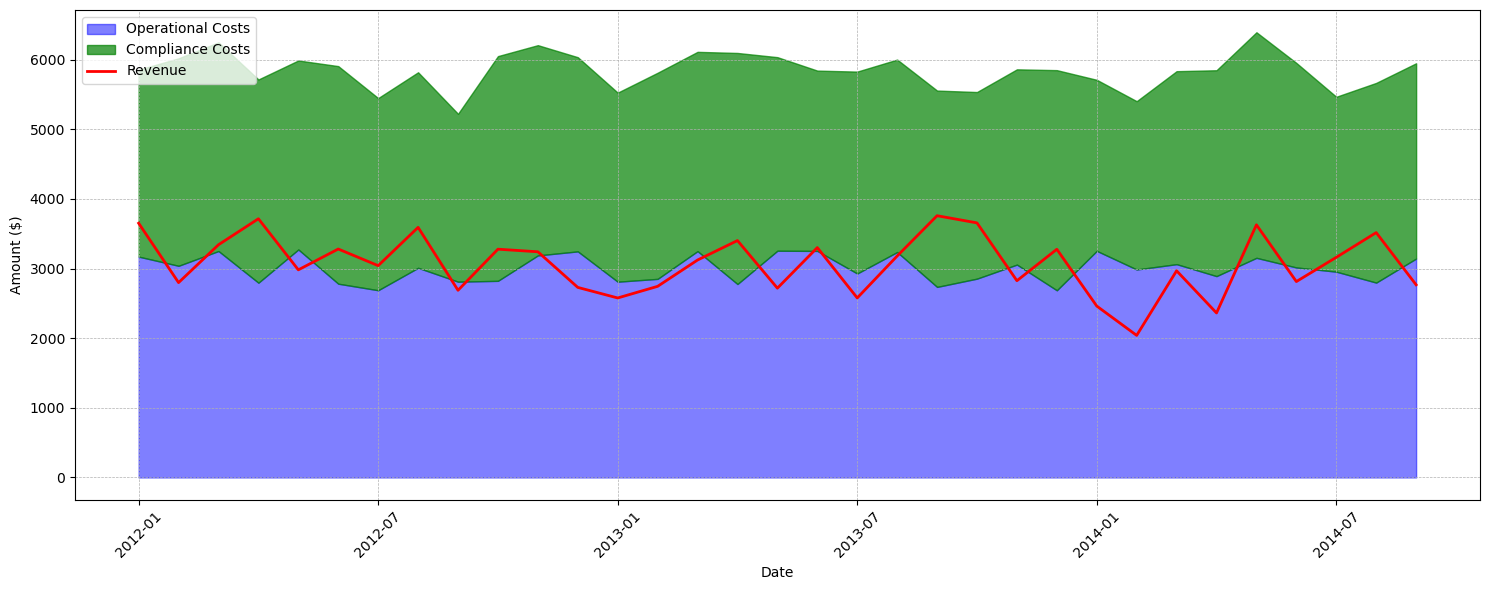

In [86]:
# Create Revenue column
hist_data["Revenue"] = hist_data["Energy Price"] * hist_data["Energy Consumption (kWh)"]

# Merge dataframes
merged_regulatory_data = pd.merge(hist_data, reg_data, on="Date/Time", how="inner")

# Create Year and Month columns
merged_regulatory_data["Year"] = merged_regulatory_data["Date/Time"].dt.year
merged_regulatory_data["Month"] = merged_regulatory_data["Date/Time"].dt.month

# --- FIX FOR TYPEERROR: Select only numeric columns for aggregation ---

# List all the columns that contain numbers you want to average
numeric_cols_to_average = [
    "Energy Demand",
    "Energy Consumption (kWh)",
    "Energy Price",
    "Operational Costs",
    "Energy Production (kWh)",
    "Revenue",
    "Compliance Costs"
]

# Select only the grouping keys ('Year', 'Month') and the numeric columns
data_for_aggregation = merged_regulatory_data[
    ["Year", "Month"] + numeric_cols_to_average
]

# Aggregate data (using the clean data_for_aggregation DataFrame)
monthly_aggregated_data = data_for_aggregation.groupby(["Year", "Month"]).mean().reset_index()

# Create 'Year-Month' column for plotting
monthly_aggregated_data["Year-Month"] = (
    monthly_aggregated_data["Year"].astype(str) + 
    '-' + 
    monthly_aggregated_data["Month"].astype(str).str.zfill(2)
) 

# --- Plotting Code ---

plt.figure(figsize=(15, 6))

# FILL BETWEEN 1: Operational Costs (Base Layer)
plt.fill_between(
    monthly_aggregated_data["Year-Month"], 
    monthly_aggregated_data["Operational Costs"], 
    color='blue', 
    label='Operational Costs', 
    alpha=0.5 
)

# FILL BETWEEN 2: Compliance Costs (Stacked on top of Operational Costs)
plt.fill_between(
    monthly_aggregated_data["Year-Month"], 
    monthly_aggregated_data["Operational Costs"],  
    monthly_aggregated_data['Operational Costs'] + monthly_aggregated_data['Compliance Costs'], 
    color='green',
    label='Compliance Costs',
    alpha=0.7
) 

# Line plot for Revenue
sns.lineplot(
    data=monthly_aggregated_data, 
    x="Year-Month",             
    y="Revenue", 
    label="Revenue", 
    color="red", 
    linewidth=2,
    errorbar=None 
)

plt.xlabel('Date')
plt.ylabel("Amount ($)")
plt.legend(loc="upper left")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Setting X-ticks
labels = monthly_aggregated_data["Year-Month"].tolist()
n = 6 
plt.xticks(labels[::n], labels[::n], rotation=45) 

plt.tight_layout()
plt.show()

###  **Analyzing Competition from Renewable Energy Providers**
#### 1. To understand the competition from renewable energy providers and its impact on Energy Enterprise, We'll analyse the Energy 
#### Source column from the historical_energy_data dataset 
#### Visualizing the trends in energy production based on the energy source(fossil fuels vs renewables) over time. This will give us insight into how the production from renewables has evolved and potentially affected the company's maeket share


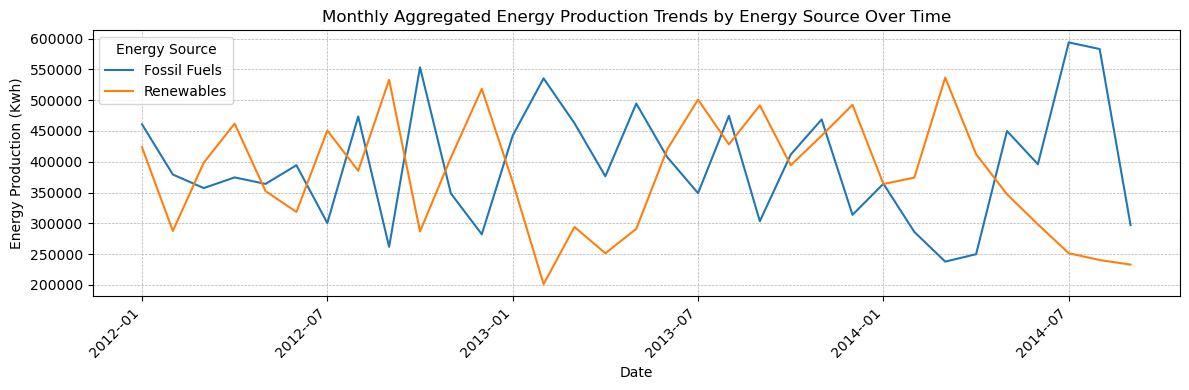

In [91]:
# Ensure necessary data columns are prepared
hist_data["Year"] = hist_data['Date/Time'].dt.year
hist_data["Month"] = hist_data['Date/Time'].dt.month

# Aggregate data: Select the column to sum BEFORE the .sum() call to avoid TypeError
monthly_aggregated_data = (
    hist_data.groupby(['Year', 'Month', 'Energy Source'])['Energy Production (kWh)']
    .sum()
    .reset_index()
)

# Create 'Year-Month' column (zero-padding the month for correct sorting/plotting)
monthly_aggregated_data["Year-Month"] = (
    monthly_aggregated_data["Year"].astype(str) + 
    '--' + 
    monthly_aggregated_data["Month"].astype(str).str.zfill(2)
)

plt.figure(figsize=(12, 4))

# --- CRITICAL ADDITION: PLOTTING THE LINE CHART ---
sns.lineplot(
    data=monthly_aggregated_data,
    x="Year-Month",
    y="Energy Production (kWh)",
    hue="Energy Source",  # This creates separate lines for each energy source
    errorbar=None         # Ensures clean lines without error bars
)
# --------------------------------------------------

plt.title('Monthly Aggregated Energy Production Trends by Energy Source Over Time')
plt.xlabel("Date")
plt.ylabel("Energy Production (Kwh)")

# NOTE: Seaborn's lineplot automatically generates the legend, but we can set its title
plt.legend(title="Energy Source") 

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Setting X-ticks for cleaner display
labels = monthly_aggregated_data["Year-Month"].unique().tolist()
n = 6 

# Get tick positions (0, 1, 2, 3, ...) and filter them
tick_positions = np.arange(0, len(labels), n)
tick_labels = labels[::n]

# Use the filtered positions and labels with a visible rotation
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()